### Movie Metrics: Trends in Ratings, Genres, and Revenues
<hr/>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('./IMDB-Movie-Data.csv')
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
print("The shape of the dataset is : ",data.shape)

The shape of the dataset is :  (1000, 12)


In [5]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [6]:
data.dropna(inplace=True)
print("The shape of modified dataset is : ",data.shape)

The shape of modified dataset is :  (838, 12)


In [7]:
print("Information of the dataset : ")
data.info()

Information of the dataset : 
<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


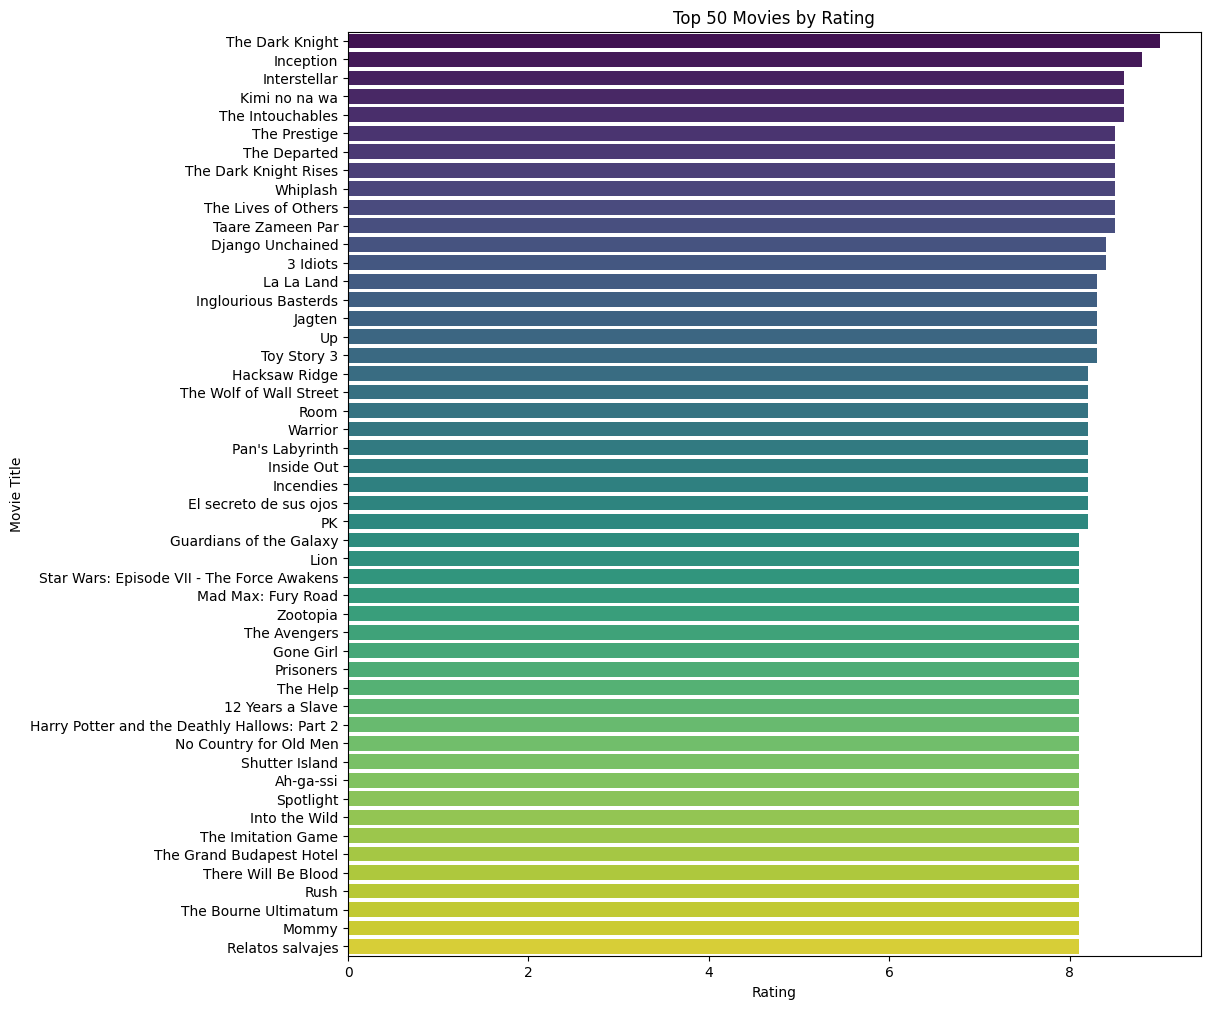

In [12]:
# Bar Plot of Movie Ratings
top_n = data.nlargest(50, 'Rating')  # Top 50 movies

# Create the horizontal bar plot
plt.figure(figsize=(11, 12))
sns.barplot(y='Title', x='Rating', data=top_n, palette='viridis', hue="Title", dodge=False, legend=False)
plt.title('Top 50 Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie Title')

plt.show()

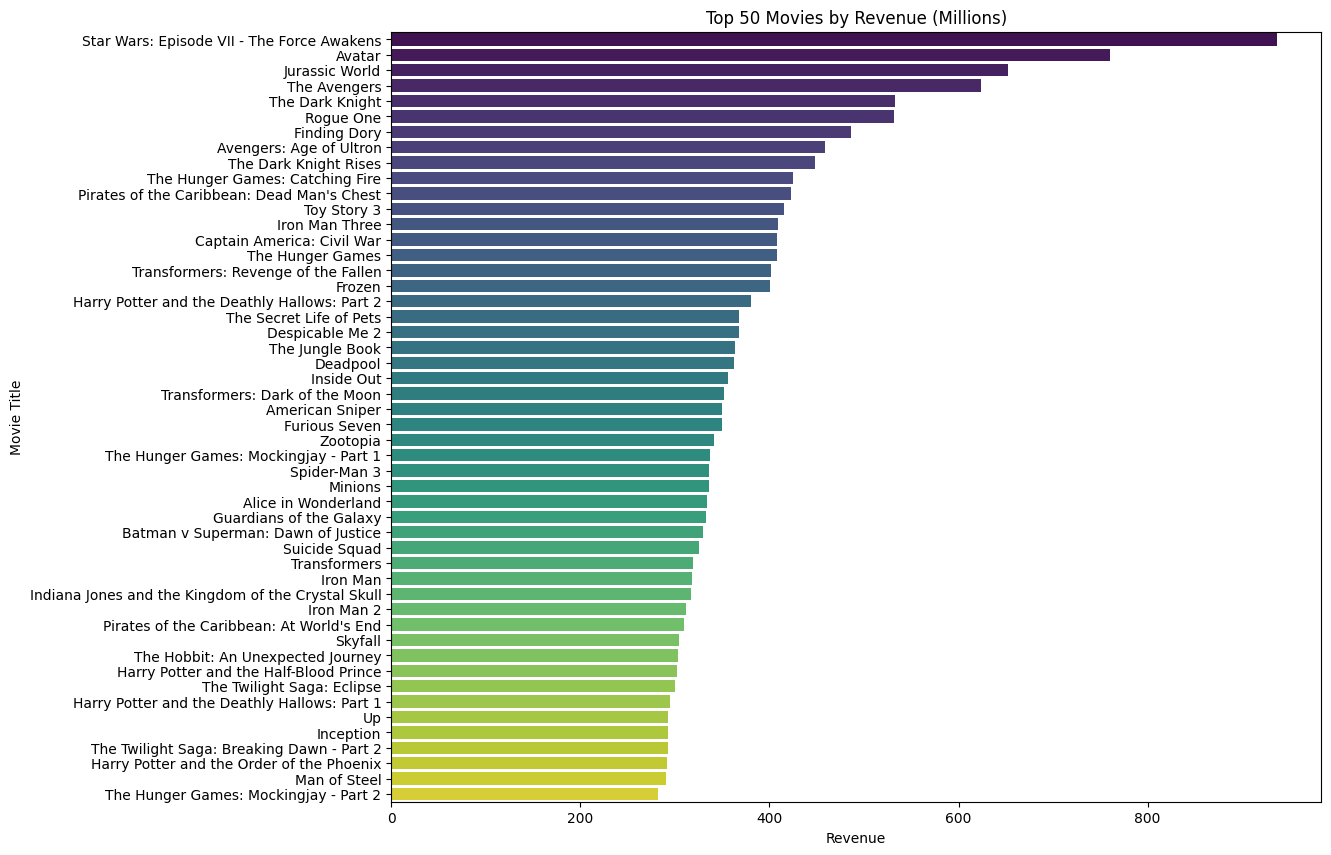

In [18]:
# Bar Plot of Movie Revenue
top_n = data.nlargest(50, 'Revenue (Millions)')  # Top 50 movies

# Create the horizontal bar plot
plt.figure(figsize=(12, 10))
sns.barplot(y='Title', x='Revenue (Millions)', data=top_n, palette='viridis', hue="Title", dodge=False, legend=False)
plt.title('Top 50 Movies by Revenue (Millions)')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')

plt.show()

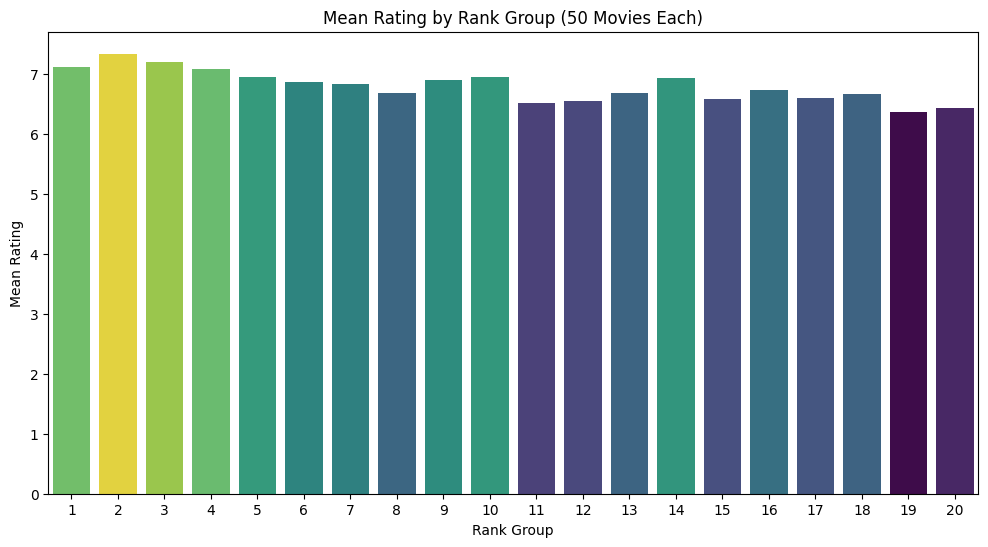

In [22]:
# Bar Plot of Movie Ratings by group
# Group by Rank (in groups of 50)
data['Rank_Group'] = (data['Rank'] - 1) // 50 + 1

# Calculate the mean rating for each group
grouped_data = data.groupby('Rank_Group')['Rating'].mean().reset_index()

# Rename columns for clarity
grouped_data.columns = ['Rank_Group', 'Mean_Rating']

plt.figure(figsize=(12, 6))
sns.barplot(x='Rank_Group', y='Mean_Rating', hue="Mean_Rating", data=grouped_data, palette='viridis', dodge=False, legend=False)

plt.title('Mean Rating by Rank Group (50 Movies Each)')
plt.xlabel('Rank Group')
plt.ylabel('Mean Rating')
plt.show()

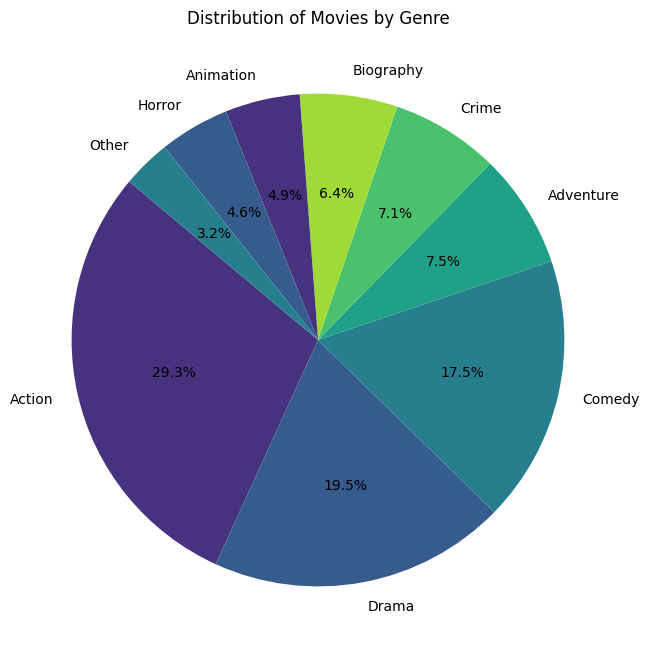

In [ ]:
# Pie Chart of Movie Genres
# For simplicity, we'll only take the first genre listed for each movie
data['Primary Genre'] = data['Genre'].apply(lambda x: x.split(',')[0])
genre_counts = data['Primary Genre'].value_counts()
genre_percent = genre_counts / genre_counts.sum()

# Define the threshold for small genres
threshold = 0.04  # 5%

# Aggregate small genres
small_genres = genre_percent[genre_percent < threshold]
other_count = small_genres.sum() * genre_counts.sum()

# Filter out small genres and add "Other"
genre_counts_filtered = genre_counts[genre_percent >= threshold]
genre_counts_filtered['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts_filtered, labels=genre_counts_filtered.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Movies by Genre')
plt.show()

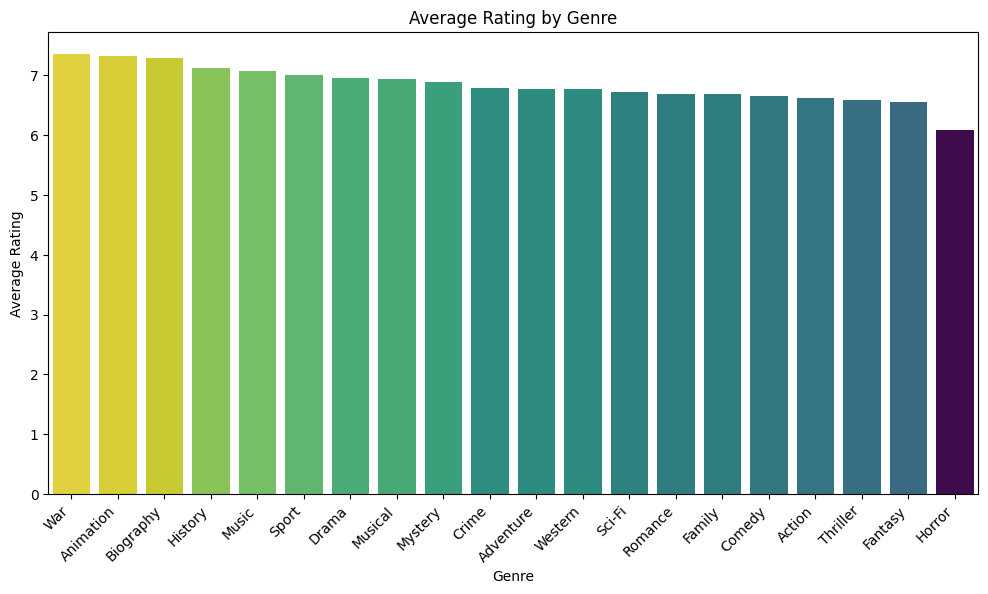

In [ ]:

# Split genres and explode the DataFrame
data['Genre'] = data['Genre'].str.split(',')
data_exploded = data.explode('Genre')

# Calculate the mean rating for each genre
genre_rating = data_exploded.groupby('Genre')['Rating'].mean().reset_index()

# Sort the data by rating for better visualization
genre_rating = genre_rating.sort_values(by='Rating', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Rating', data=genre_rating, hue="Rating", palette='viridis', legend=False)

plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

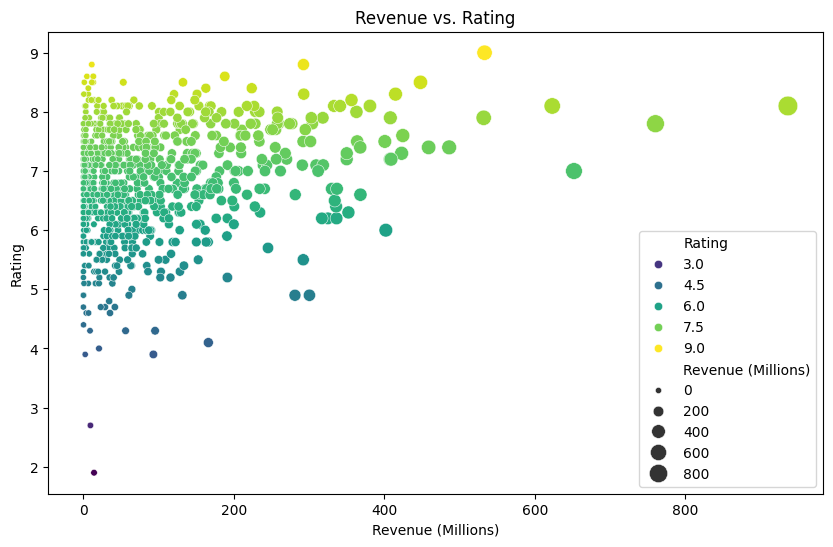

In [ ]:
#  Scatter Plot Revenue vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue (Millions)', y='Rating', data=data, hue='Rating', size='Revenue (Millions)', palette='viridis', sizes=(20, 200))
plt.title('Revenue vs. Rating')
plt.xlabel('Revenue (Millions)')
plt.ylabel('Rating')
plt.show()

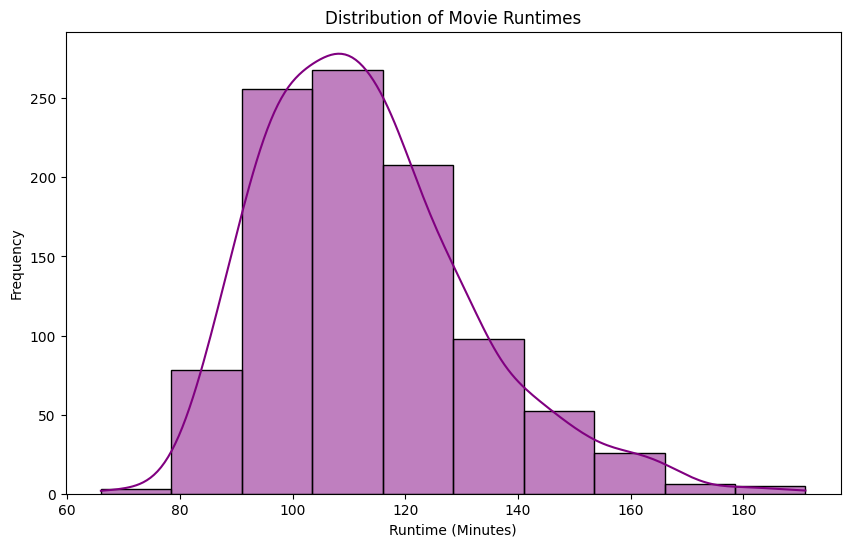

In [ ]:
# Histogram of Movie Runtimes
plt.figure(figsize=(10, 6))
sns.histplot(data['Runtime (Minutes)'], bins=10, kde=True, color='purple')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.show()

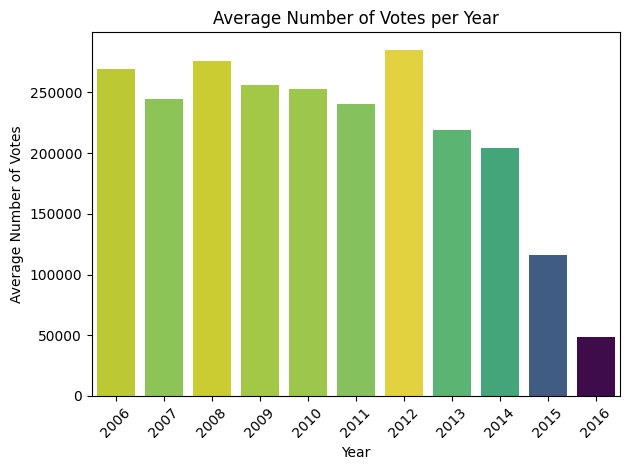

In [ ]:
# Convert relevant columns to numeric types if necessary
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Remove rows with NaN values in 'Votes' and 'Year'
data_clean = data.dropna(subset=['Votes', 'Year'])

# Column names
votes_column = 'Votes'
year_column = 'Year'

# Check for unique values in the Votes column and their counts
value_counts = data_clean[votes_column].value_counts()

# Bar plot to see the relationship between Votes and Year
# Aggregate data by year to show the average number of votes per year
votes_per_year = data_clean.groupby(year_column)[votes_column].mean().reset_index()

sns.barplot(data=votes_per_year, x=year_column, y=votes_column, hue=votes_column, palette='viridis', legend=False, dodge=False)
plt.title(f'Average Number of Votes per {year_column}')
plt.xlabel('Year')
plt.ylabel('Average Number of Votes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


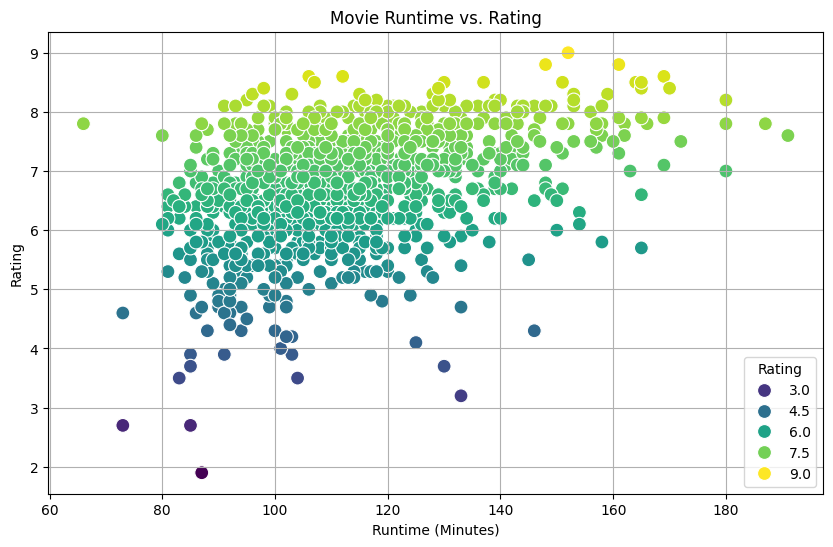

In [ ]:

# Plotting runtime vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime (Minutes)', y='Rating', data=data, hue='Rating', s=100, palette='viridis')

plt.title('Movie Runtime vs. Rating')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

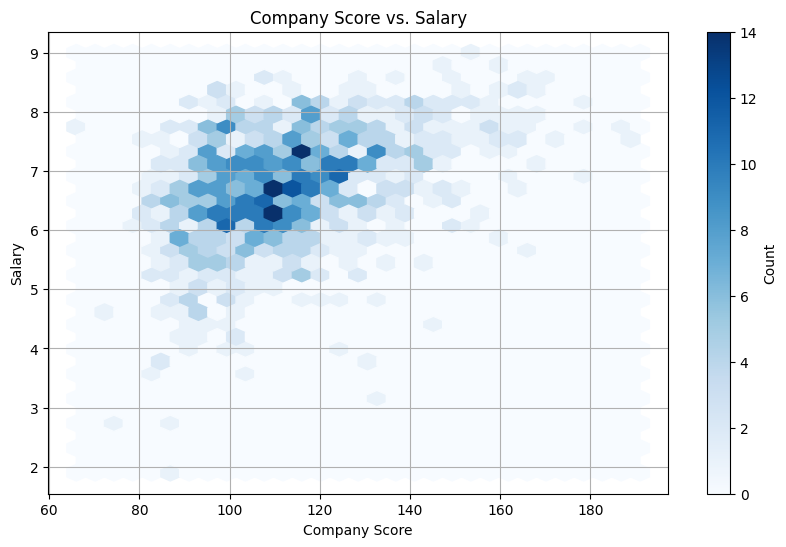

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(data['Runtime (Minutes)'], data['Rating'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Company Score vs. Salary')
plt.xlabel('Company Score')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

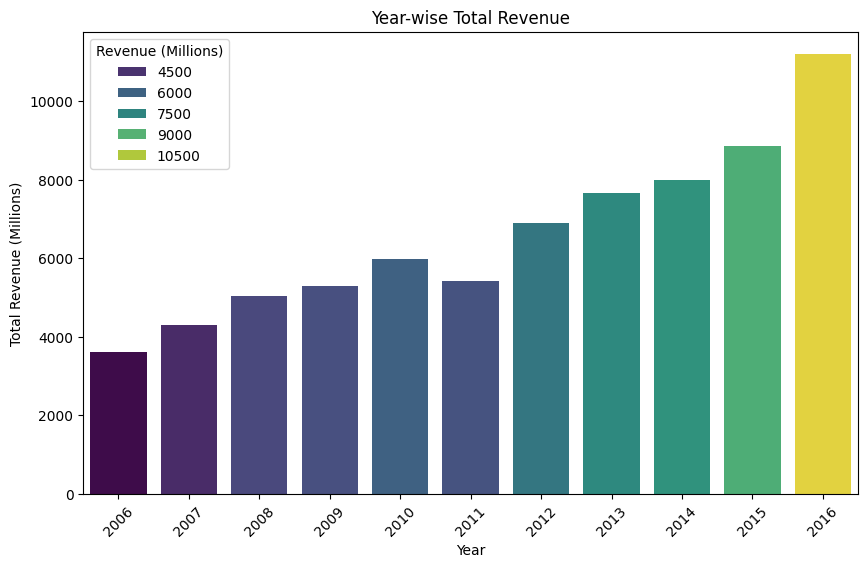

In [ ]:
# Group by Year and sum the revenue
yearly_revenue = data.groupby('Year')['Revenue (Millions)'].sum().reset_index()

# Plotting year-wise revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Revenue (Millions)', hue="Revenue (Millions)", data=yearly_revenue, palette='viridis')

plt.title('Year-wise Total Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.show()